In [56]:
import pandas as pd
a=pd.read_csv('/content/Breast_cancer_data.csv')
print(a)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0  
1            0  
2           

In [57]:
print(a.shape)

(569, 6)


In [58]:
print(a.columns)

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')


In [59]:
print(a.dtypes)

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object


In [60]:
print(a.isnull().sum())

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


In [62]:
y=a['diagnosis']
print("THE TARGET VAIRIABLE")
print(y)

THE TARGET VAIRIABLE
0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


In [64]:
x=a.drop('diagnosis',axis=1)
print("FEATURES")
print(x)

FEATURES
     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0          17.99         10.38          122.80     1001.0          0.11840
1          20.57         17.77          132.90     1326.0          0.08474
2          19.69         21.25          130.00     1203.0          0.10960
3          11.42         20.38           77.58      386.1          0.14250
4          20.29         14.34          135.10     1297.0          0.10030
..           ...           ...             ...        ...              ...
564        21.56         22.39          142.00     1479.0          0.11100
565        20.13         28.25          131.20     1261.0          0.09780
566        16.60         28.08          108.30      858.1          0.08455
567        20.60         29.33          140.10     1265.0          0.11780
568         7.76         24.54           47.92      181.0          0.05263

[569 rows x 5 columns]


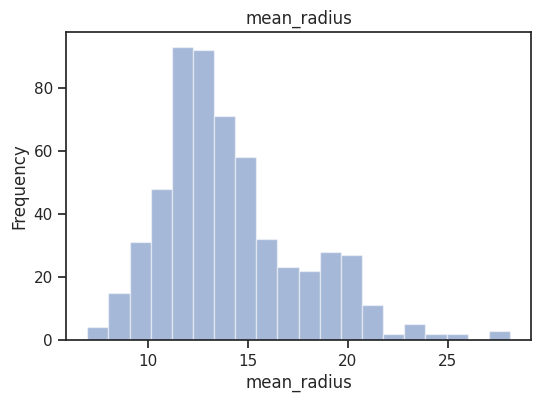

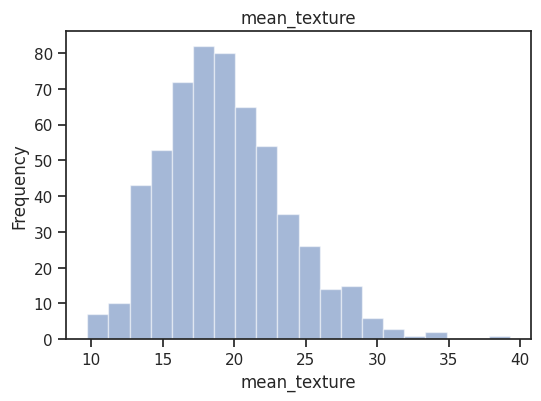

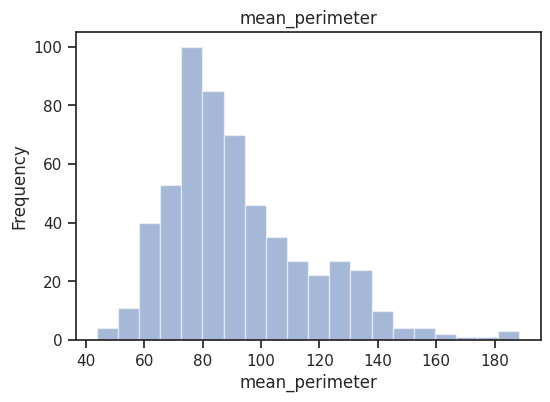

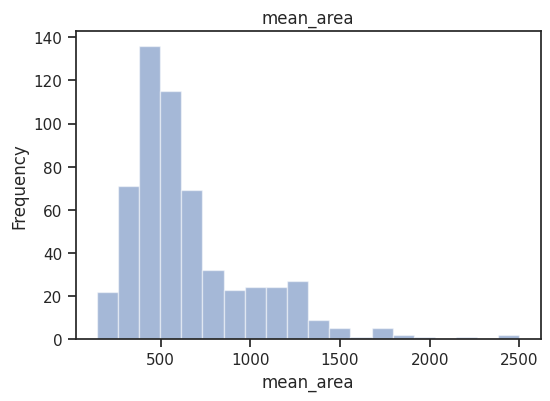

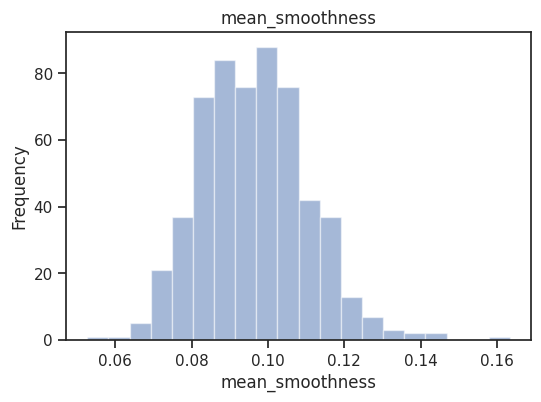

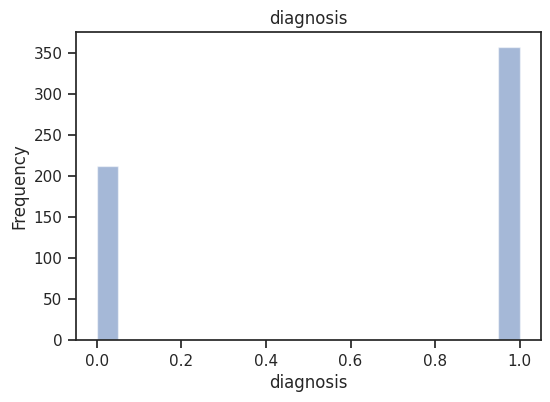

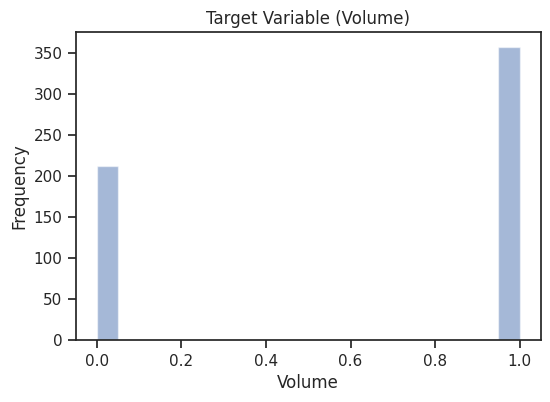

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
for column in a.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(a[column], bins=20, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"{column}")
    plt.show()

# Plot histogram for the target variable
plt.figure(figsize=(6, 4))
plt.hist(a['diagnosis'], bins=20, alpha=0.5)
plt.xlabel('Volume')
plt.ylabel("Frequency")
plt.title("Target Variable (Volume)")
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
338       10.050         17.53           64.41      310.8          0.10070
427       10.800         21.98           68.79      359.9          0.08801
406       16.140         14.86          104.30      800.0          0.09495
96        12.180         17.84           77.79      451.1          0.10450
490       12.250         22.44           78.18      466.5          0.08192
..           ...           ...             ...        ...              ...
277       18.810         19.98          120.90     1102.0          0.08923
9         12.460         24.04           83.97      475.9          0.11860
359        9.436         18.32           59.82      278.6          0.10090
192        9.720         18.22           60.73      288.1          0.06950
559       11.510         23.93           74.52      403.5          0.09261

[455 rows x 5 columns]
     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
5

In [68]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [69]:
#svm model
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)

svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)

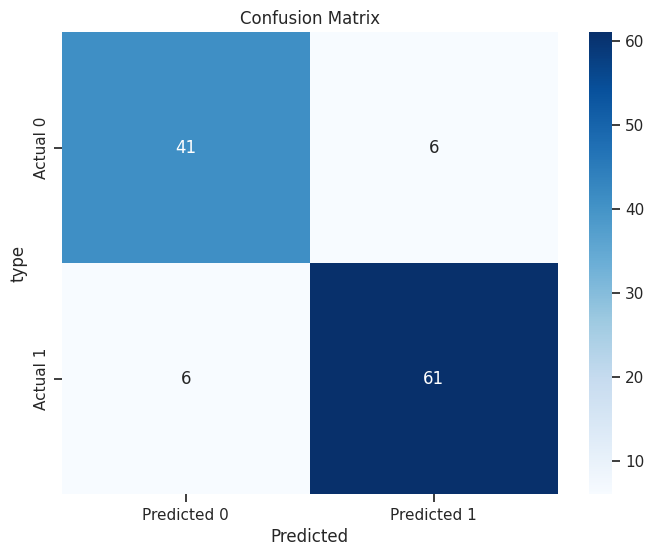

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in set(y)],
            yticklabels=[f'Actual {i}' for i in set(y)])
plt.xlabel('Predicted')
plt.ylabel('type')
plt.title('Confusion Matrix')
plt.show()

In [71]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy using SVM model:", accuracy)

Accuracy using SVM model: 0.8947368421052632


In [72]:
from sklearn.metrics import classification_report

svm_report=classification_report(y_test, y_pred,zero_division=0)

print("Classification Report:\n",svm_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        47
           1       0.91      0.91      0.91        67

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

grid_model = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

grid_model.fit(x_train, y_train)

print("Best Parameters:")
print(grid_model.best_params_)

y_pred_grid = grid_model.predict(x_test)

print("Classification Report after GridSearchCV:")
print(classification_report(y_test, y_pred_grid))
print("Confusion Matrix after GridSearchCV:")
print(confusion_matrix(y_test, y_pred_grid))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.879 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf